In [53]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [54]:
a = pd.read_pickle('shear_rate_0k')
b = pd.read_pickle('shear_rate_10k')
c = pd.read_pickle('shear_rate_20k')
d = pd.read_pickle('shear_rate_25k')
e = pd.read_pickle('shear_rate_30k')
f = pd.read_pickle('shear_rate_40k')
g = pd.read_pickle('shear_rate_50k')
h = pd.read_pickle('shear_rate_90k')
X=a
for i in [b,c,d,e,f,g,h]:
    X=X.append(i)
X = X.reset_index(drop=True)
#print(X)

In [55]:
a = pd.read_pickle('shear_rate_0k')
a=a.sample(n = 296)
b = pd.read_pickle('shear_rate_10k')
b=b.sample(n = 296)
e = pd.read_pickle('shear_rate_30k')
e=e.sample(n = 296)
f = pd.read_pickle('shear_rate_40k')
f=f.sample(n = 296)
g = pd.read_pickle('shear_rate_50k')
g=g.sample(n = 296)
h = pd.read_pickle('shear_rate_90k')
h=h.sample(n = 296)
X=a
for i in [b,e,f,g,h]:
    X=X.append(i)
X = X.reset_index(drop=True)
#print(X)

In [56]:
#X = pd.read_pickle('all_shear_rates')
Y = X[['shear rate']].values.ravel()
print(Y)
X=X.drop(columns=['shear rate'])
print(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

[    0.     0.     0. ... 90000. 90000. 90000.]
      eccentricity  convex_area  major_axis_length  minor_axis_length  \
0         0.899746         33.0           9.583854           4.182521   
1         0.884848         89.0          15.072233           7.021863   
2         0.823280         47.0           9.988233           5.669674   
3         0.829095         55.0          10.562740           5.905710   
4         0.859961         47.0          10.460918           5.338839   
5         0.932918         78.0          16.723189           6.021849   
6         0.874979         60.0          12.629581           6.114738   
7         0.817040         68.0          11.728141           6.762230   
8         0.936999         79.0          15.292609           5.342206   
9         0.899477         39.0          10.243255           4.475980   
10        0.873280         36.0           9.405290           4.582437   
11        0.857561         23.0           7.001982           3.601700   
12 

In [57]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.1382912406249862
test score:  0.009237338609281442
number of features used:  5


In [58]:
y_pred = lasso.predict(X_test)
print(y_pred)

[  52861.31609662   46314.9987684    39239.24679217   24362.60200732
   36444.30185198   33073.79399524   28862.58040758   38431.08317629
   21211.43788697   41835.68664721   36591.87673709   29659.92666546
   41014.21622052   42606.2921864    41422.79050826   49652.37268468
   12008.07996397   40707.21177404   48242.1218959    41900.90522677
   54670.82411046   42602.66864802   35364.78110666   29748.96581047
   41300.61691999   34951.46916953   42937.4991562    39792.7099172
   52084.29341507   22075.50490142   33523.6980227    46673.28272266
   39554.22897025   41669.71833615   28374.11400567   29425.94195534
   51572.07860036   52089.6530035    48451.83887989   19184.83248711
   50853.87470457   43108.90579233   32333.26732176   29333.7483968
   16765.65989796   45138.3679765    30937.89178048   37227.0356269
   35457.02858669   20277.48655267   28528.55689126   30356.16947173
   28685.34773701   35771.63016216   19177.83567824   37603.54262786
   19491.18908073   25007.62881942   

In [59]:
print(y_test)

[90000. 40000. 90000. 40000. 30000.     0.     0. 90000. 50000. 40000.
     0. 10000. 40000. 40000. 50000. 50000. 10000. 10000. 40000. 90000.
 10000. 10000. 10000. 10000. 90000. 10000.     0. 40000.     0. 10000.
     0. 10000. 50000. 50000.     0. 40000. 40000. 10000. 90000. 10000.
 90000. 90000. 40000. 50000. 10000. 30000. 30000. 10000.     0. 50000.
 40000. 50000. 10000. 50000. 30000.     0. 30000.     0.     0. 50000.
 90000. 50000. 50000.     0.     0. 10000. 10000. 50000. 30000.     0.
 40000. 30000. 10000.     0.     0. 50000. 10000. 90000. 40000. 40000.
 40000. 90000. 30000. 40000. 10000. 50000. 30000. 90000. 90000. 90000.
 50000. 50000. 30000. 40000. 30000. 40000.     0. 90000. 50000. 30000.
 40000. 50000. 10000. 90000. 50000. 50000. 30000. 50000. 50000. 50000.
 30000.     0. 10000. 40000. 10000. 30000. 10000. 30000. 50000. 10000.
 30000. 30000. 40000.     0. 30000.     0. 30000. 50000. 50000. 30000.
 30000. 10000. 90000. 50000.     0. 90000.     0.     0. 90000.     0.
 30000

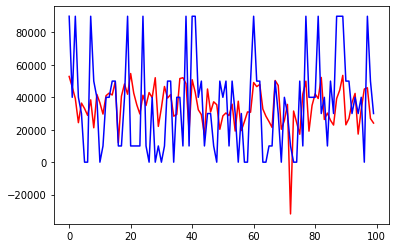

In [60]:
fig,ax=plt.subplots()
ax.plot(y_pred[:100], color="red",)
ax.plot(y_test[:100], color="blue",)
plt.show()

In [61]:
import random
a=np.random.choice(y_pred, size=100)
b=np.random.choice(le.transform(y_test), size=100) 

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(15,5))
plt.plot(a, 'o', color='red', markersize=7, label='Prediction')
plt.plot(b, 'o', color='black', markersize=4, label='Test')
plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.xlabel('Count')
plt.ylabel('Shear rate (/s)')
plt.yticks(tick_marks, shear_rate)

plt.savefig('SVC.png')

NameError: name 'le' is not defined